# Setup

Import the relevant packages.

In [1]:
import os
import pandas as pd
import numpy as np
import random

# packages for modelling and evaluation
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, plot_confusion_matrix #needs to be version >=0.24.2

# packages for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# set a fixed random state to produce the same results
RANDOM_STATE = 42
random.seed(RANDOM_STATE)
np.random.seed(RANDOM_STATE)

# Read Data

The data are given in a csv table. The first column is the label, the other coloumns are the pixels of the flattened image. 

In [2]:
path = "/home/frauke/GAN/data/MNIST"
data = pd.read_csv(os.path.join(path, "train.csv"))
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Generate Train and Validation Set

Use the ```train_test_split``` method from the ```sklearn``` package (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

In [3]:
# save labels and samples separately
X = np.array(data.iloc[:,1:])
y = np.array(data.iloc[:,0])
print(f'Data shape: X: {X.shape}, y: {y.shape}')

Data shape: X: (42000, 784), y: (42000,)


In [4]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=RANDOM_STATE)
print(f'Data shape after splitting:')
print(f'Train Dataset: X: {X_train.shape}, y: {y_train.shape}')
print(f'Validation Dataset: X: {X_valid.shape}, y: {y_valid.shape}')

Data shape after splitting:
Train Dataset: X: (33600, 784), y: (33600,)
Validation Dataset: X: (8400, 784), y: (8400,)


# Visualize the Data

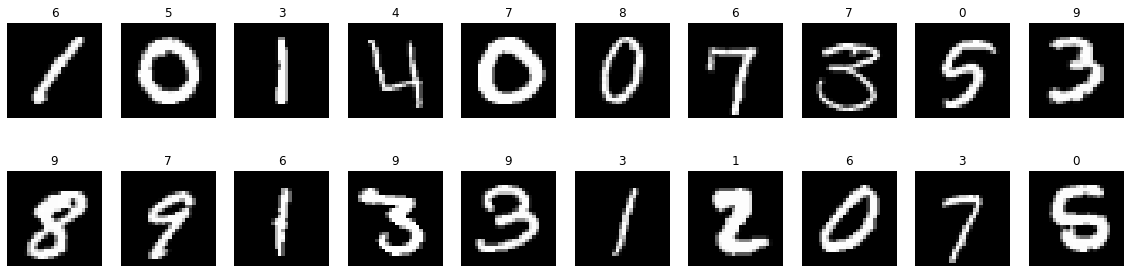

In [5]:
X_image = X.reshape(X.shape[0], 28, 28)

fig, axes = plt.subplots(2,10, figsize=(20,5))

for i, ax in enumerate(axes.flatten()):
    ax.imshow(X_image[i].reshape(28,28), cmap='gray')
    ax.axis('off')
    ax.set_title(y_train[i])

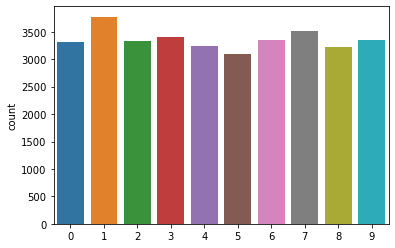

In [6]:
# plot number of each class
sns.countplot(y_train);

# Predictive Modelling

In [7]:
n_estimators = 100
rf=RandomForestClassifier(n_estimators=n_estimators)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_valid)

# Evaluation

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html

In [8]:
print ("Classification Report")
print(classification_report(y_valid, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       816
           1       0.98      0.99      0.99       909
           2       0.96      0.96      0.96       846
           3       0.96      0.95      0.96       937
           4       0.96      0.97      0.96       839
           5       0.96      0.96      0.96       702
           6       0.96      0.98      0.97       785
           7       0.97      0.95      0.96       893
           8       0.95      0.95      0.95       835
           9       0.93      0.94      0.94       838

    accuracy                           0.96      8400
   macro avg       0.96      0.96      0.96      8400
weighted avg       0.96      0.96      0.96      8400



Confusion Matrix


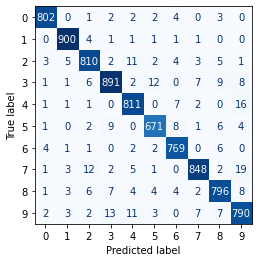

In [9]:
print ("Confusion Matrix")
plot_confusion_matrix(rf, X_valid, y_valid,
                      cmap=plt.cm.Blues,
                      colorbar=False)
plt.show()

# Plot Predictions

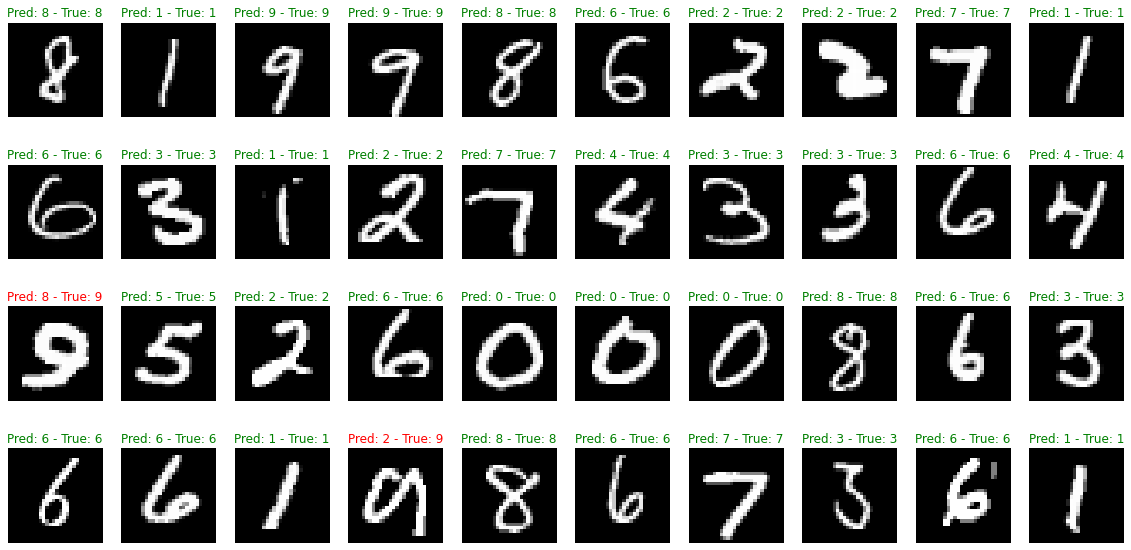

In [25]:
fig, axes = plt.subplots(4,10, figsize=(20,10))

for i, ax in enumerate(axes.flatten()):
    ax.imshow(X_valid[i].reshape(28, 28), cmap="gray")
    ax.axis('off')
    ax.set_title(f"Pred: {y_pred[i]} - True: {y_valid[i]}",
                color=("green" if y_pred[i]==y_valid[i] else "red"))